# Fitting the "ionic model" of isotope fractionation 

The starting point is to imagine that the isotope vibrates in a potential well
that somehow represents the effective bonding between the atom of interest and
the rest of the crystal. We can follow Young et al. (2015) and represent the
interaction via a Born–Mayer type interionic potential:

$$ E(r) = \frac{z_1 z_2}{r}\left(\frac{e^2}{4\pi\epsilon_0}\right) + \frac{b}{r^n} + E_0,$$

which gives the energy of the bond, $E$, as a function of the distance between the ions, $r$.
The first term represents the Coulomb interaction between ions (which is attractive 
for ions of opposite charge since reducing $r$ makes the energy more negative). The
the second term represents repulsion between ions due to overlap of their electron clouds. At small
$r$ this repulsion dominates and there is an $r$, the equilibrium bond length, $r_0$, 
which minimizes $E$. The parameters $z_1$ and $z_2$ represent the charges on the ions, $e$ is the 
charge of an electron, $\epsilon_0$ is the vacuum permittivity. The parameters $b$ and $n$ 
define the strength and shape of the repulsion term. $E_0$ just sets the absolute energy (and is not further
involved otherwise). 

The force acting between the ions is the derivative of the energy with respect to distance
(I think the convention is usually that the force is the negative derivative, but that would
either imply a sign error in Young et al. 2015 or that I cannot take the derivative of a
polynomial), which leads to equation 30 of Young et al. 2015:

$$ F(r) = \frac{\mathrm{d}E}{\mathrm{d}r} 
        =  -\frac{z_1 z_2}{r^2}\left(\frac{e^2}{4\pi\epsilon_0}\right)
           - \frac{bn}{r^{n+1}}.$$    

At the equilibrium bond distance, $r_0$, $\frac{\mathrm{d}E}{\mathrm{d}r} = 0$. This
means we can find $b$ in terms of the other parameters such that we can choose $r_0$:

$$ b = -\left(\frac{e^2}{4\pi\epsilon_0}\right)\frac{z_1 z_2}{nr_0^{n-1}}. $$

Commonly $n$ is set to 12, $r_0$ is taken from the ionic radii, and this sets $b$ for the
mineral of interest.

For isotopic fractionation, we need the force constant, $K_f$ for the effective bond. This is given
by the second derivative of the energy with respect to distance:

$$ K(r) = \frac{\mathrm{d}^2E}{\mathrm{d}r^2}
        = \frac{2 z_1 z_2}{r^3}\left(\frac{e^2}{4\pi\epsilon_0}\right)
           - \frac{b(n-1)n}{r^{n+2}},$$
           
evaluated at $r_0$. Substituting $b$ and $r_0$ into this function gives $K_f$:

$$K_f = K(r=r_0) = \frac{2z_1 z_2}{r_0^3}\left(\frac{e^2}{4\pi\epsilon_0}\right)
           - \left(\frac{z_1 z_2 e^2}{4\pi\epsilon_0}\right)\frac{(n-1)n}{nr_0^{n-1} r_0^{n+2}}\\
           = \frac{z_1 z_2 e^2 (1 - n)}{4\pi\epsilon_0 r_0^3},$$
           
where the final form is given as equation 31 in Young et al. (2015). The following cells implement
and plot these various functions.


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Define constants
eps0 = 8.854187817E-12 # Vacuum permittivity (F/m)
e = 1.60217662E-19 # electron charge (C)

# Conversion factors
m2ang = 1.0E10
j2ev = 6.242E18

def energy(r, zi, zj, b, n):
    """
    Energy from Born-Mayer type interionic potential
    
    r - distance between ions (m); can be array
    zi, zj - charges on ions (electrons)
    b - strength of repulsive part (J/m^n)
    n - exponent for repulsive part (-); typically ~12
    returns energy (J)
    """
    en = (zi*zj*e**2)/(4.0*np.pi*eps0*r) + (b/r**n)
    return en
    
    
def de_by_dr(r, zi, zj, b, n):
    """
    Derivative (force) of Born-Mayer type interionic potential
    
    r - distance between ions (m); can be array
    zi, zj - charges on ions (electrons)
    b - strength of repulsive part (J/m^n)
    n - exponent for repulsive part (-); typically ~12
    returns force (J/m = N)
    
    NB: Is the sign convention correct?
    """
    force = -((zi*zj*e**2)/(4.0*np.pi*eps0*r**2)) - ((b*n)/r**(n+1))
    return force


def d2e_by_dr2(r, zi, zj, b, n):
    """
    Second derivative of Born-Mayer type interionic potential
    
    r - distance between ions (m); can be array
    zi, zj - charges on ions (electrons)
    b - strength of repulsive part (J/m^n)
    n - exponent for repulsive part (-); typically ~12
    returns second derivative of energy (J/m^2 = N/m)
    """
    k = ((2.0*zi*zj*e**2)/(4.0*np.pi*eps0*r**3)) - ((b*(-n-1)*n)/r**(n+2))
    return k


def cal_b(r0, zi, zj, n):
    """
    Calculate b for Born-Mayer type interionic potential to give an equilbrium bond length
    
    r_0 - equilibrioumdistance between ions (m); can be array
    zi, zj - charges on ions (electrons)
    n - exponent for repulsive part (-); typically ~12
    returns b such that energy minimum is at r_0 (J/m^n)
    """
    b = -((zi*zj*e**2)/(4.0*np.pi*eps0*r0**2)) * r0**(n+1)/n
    return b


def kf(r0, zi, zj, n):
    """
    Calculate force constant for Born-Mayer type interionic potential
    
    r_0 - equilibrium distance between ions (m); can be array
    zi, zj - charges on ions (electrons)
    n - exponent for repulsive part (-); typically ~12
    returns force constant (J/m^n)
    """
    k = (zi * zj * e**2 * (1-n)) / (4.0 * np.pi * eps0 * r0**3)
    return k

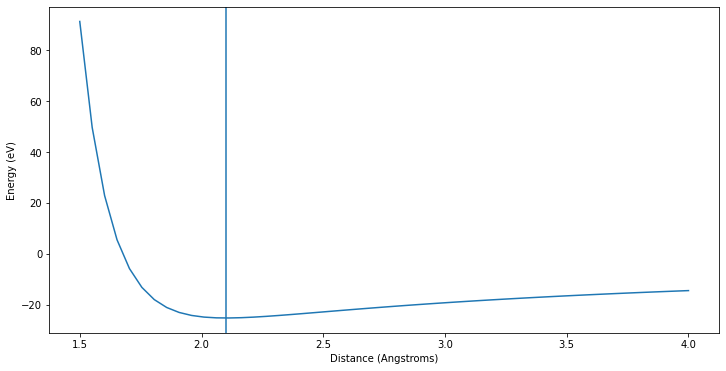

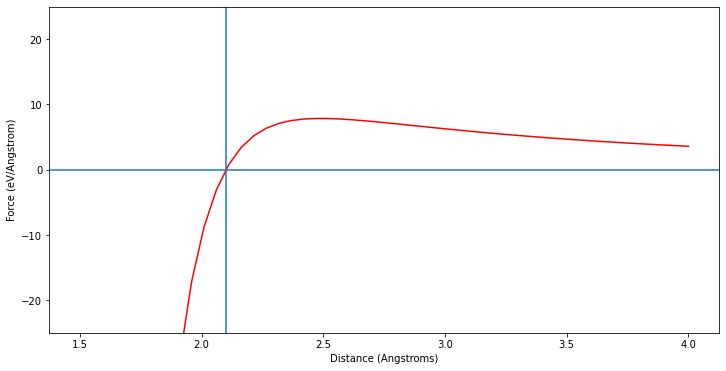

Energy around r_0: [-25.14418095 -25.14421525 -25.14418112] eV
Force at r_0: 0.0 eV/Ang
Second derivative at r0: 1096.1171631664827 N/m
Kf: 1096.117163166483 N/m


In [3]:
# Plot an example and check some values
rs = np.linspace(1.5, 4.0) # Angstroms
n = 12
zi = 2.0
zj = -2.0

r0 = 2.1 # Angstroms
b = cal_b(r0/m2ang, zi, zj, n)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(rs, energy(rs/m2ang, zi, zj, b, n)*j2ev)
ax.set_xlabel('Distance (Angstroms)')
ax.set_ylabel('Energy (eV)')
ax.axvline(r0)
plt.show()

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(rs, de_by_dr(rs/m2ang, zi, zj, b, n)*j2ev/m2ang, 'r')
ax.axvline(r0)
ax.axhline(0.0)
ax.set_ylim(-25, 25)
ax.set_xlabel('Distance (Angstroms)')
ax.set_ylabel('Force (eV/Angstrom)')
plt.show()

print("Energy around r_0:", energy(np.array([r0-0.001, r0, r0+0.001])/m2ang, zi, zj, b, n)*j2ev, "eV")
print("Force at r_0:", de_by_dr(r0/m2ang, zi, zj, b, n)*j2ev/m2ang, "eV/Ang")
print("Second derivative at r0:", d2e_by_dr2(r0/m2ang, zi, zj, b, n), "N/m")
print("Kf:", kf(r0/m2ang, zi, zj, n), "N/m") # No b